#0. 라이브러리 불러오기 및 데이터로드

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/energy_weather.csv'
df =pd.read_csv(src_path, sep =',')

In [5]:
df.head(3)

,date,yyyy,mm,dd,yyyymm,supply,temperature,precipitation
0,20171122,2017,11,22,201711,91187.0,3.2,0.0
1,20171121,2017,11,21,201711,90278.0,0.9,0.0
2,20171120,2017,11,20,201711,91442.0,-1.1,0.0


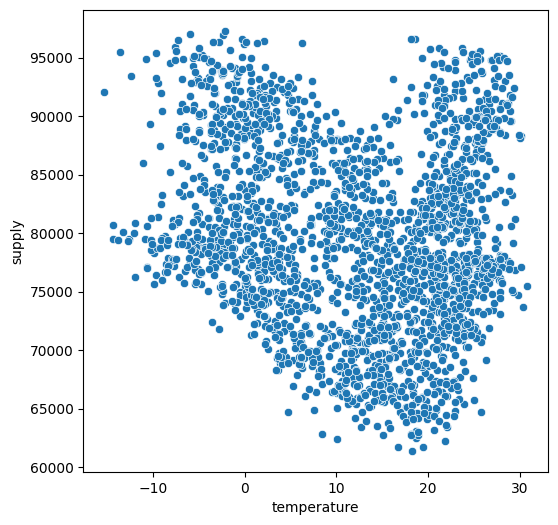

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.scatterplot(x = 'temperature', y='supply', data=df, ax=ax)
plt.show()

#1-1. 상관관계 분석(1)
stats 사용 o

* H0 : temperature와 supply 간의 선형적 관계가 있다.

* H1 : temperature와 supply 간의 선형적 관계가 없다

In [8]:
stats.pearsonr(df['temperature'], df['supply'])

PearsonRResult(statistic=-0.1842491028186803, pvalue=1.3612292253839975e-18)

statistic(공분산) < 0 : 음의 상관관계

p-value < 유의 수준 : H1 채택

#1-2 상관관계 분석(2)
stats 사용 x

In [12]:
corr_df = df[['supply','temperature','precipitation']]
corr_df.corr(method='pearson')

,supply,temperature,precipitation
supply,1.000000,-0.184249,0.029112
temperature,-0.184249,1.000000,0.115159
precipitation,0.029112,0.115159,1.000000


#2. 데이터 분할
15도 사이에서 상관관계가 음에서 양으로 보이는 양상이 보인다

In [11]:
import numpy as np

In [13]:
df['temp_class'] = np.where(df['temperature']<=15, '15_under', 'above_15')
df.head(3)

,date,yyyy,mm,dd,yyyymm,supply,temperature,precipitation,temp_class
0,20171122,2017,11,22,201711,91187.0,3.2,0.0,15_under
1,20171121,2017,11,21,201711,90278.0,0.9,0.0,15_under
2,20171120,2017,11,20,201711,91442.0,-1.1,0.0,15_under


In [15]:
df_15_under = df.loc[df['temp_class']=='15_under']
df_above_15 = df.loc[df['temp_class']=='above_15']

In [16]:
stats.pearsonr(df_15_under['temperature'], df_15_under['supply'])

PearsonRResult(statistic=-0.404001115243915, pvalue=9.374172204714132e-49)

In [17]:
stats.pearsonr(df_above_15['temperature'], df_above_15['supply'])

PearsonRResult(statistic=0.3733782285843059, pvalue=1.4956853078879646e-35)

statistic으로 확인 가능.